<a href="https://colab.research.google.com/github/Chandanapentakota/Medical-Insurance-Premium/blob/main/Medical_Insurance_Premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('insurance.csv')

dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.select_dtypes(include=['object']).columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include='object').columns)

3

In [ ]:
dataset.select_dtypes(include=['int64','float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [ ]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

4

In [ ]:
dataset.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

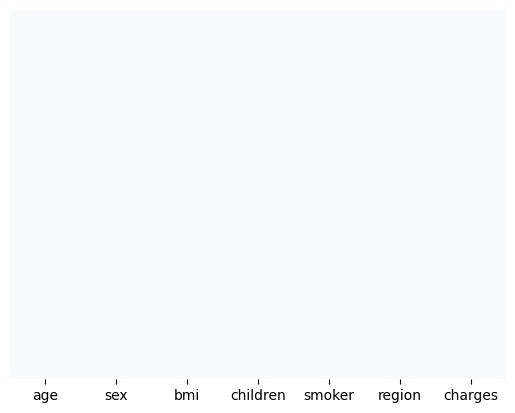

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [ ]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
dataset['sex']=dataset['sex'].apply(lambda x: 0 if x=='female' else 1)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
dataset['smoker']=dataset['smoker'].apply(lambda x:0 if x=='no' else 1)

In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
dataset.shape

(1338, 7)

In [ ]:
dataset=pd.get_dummies(data=dataset,drop_first=True)

In [ ]:
dataset

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True


In [ ]:
dataset.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [ ]:
dataset_2=dataset.drop(columns='charges')

<Axes: title={'center': 'correlation with charges'}>

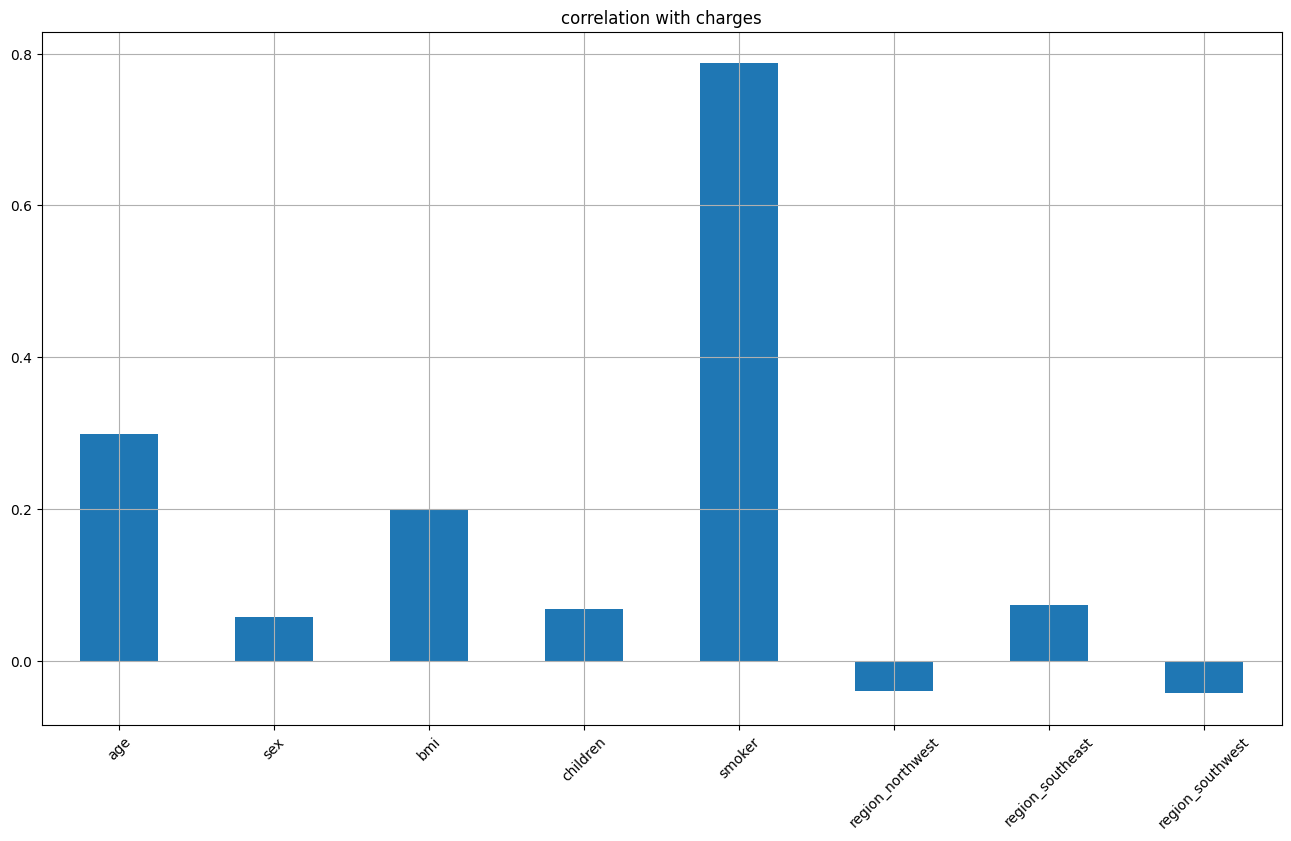

In [ ]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9),title='correlation with charges',rot=45,grid=True
)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

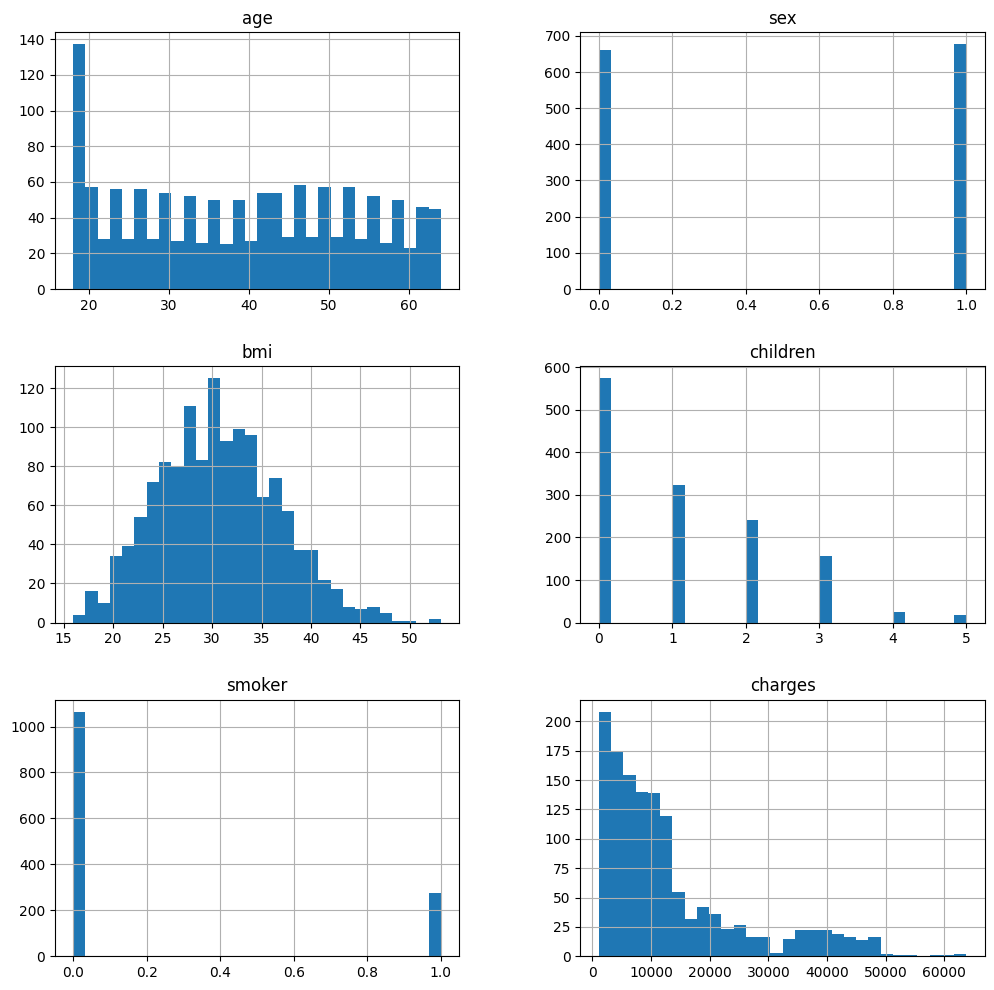

In [ ]:
dataset[['age','sex','bmi','children','smoker','charges']].hist(bins=30,figsize=(12,12))

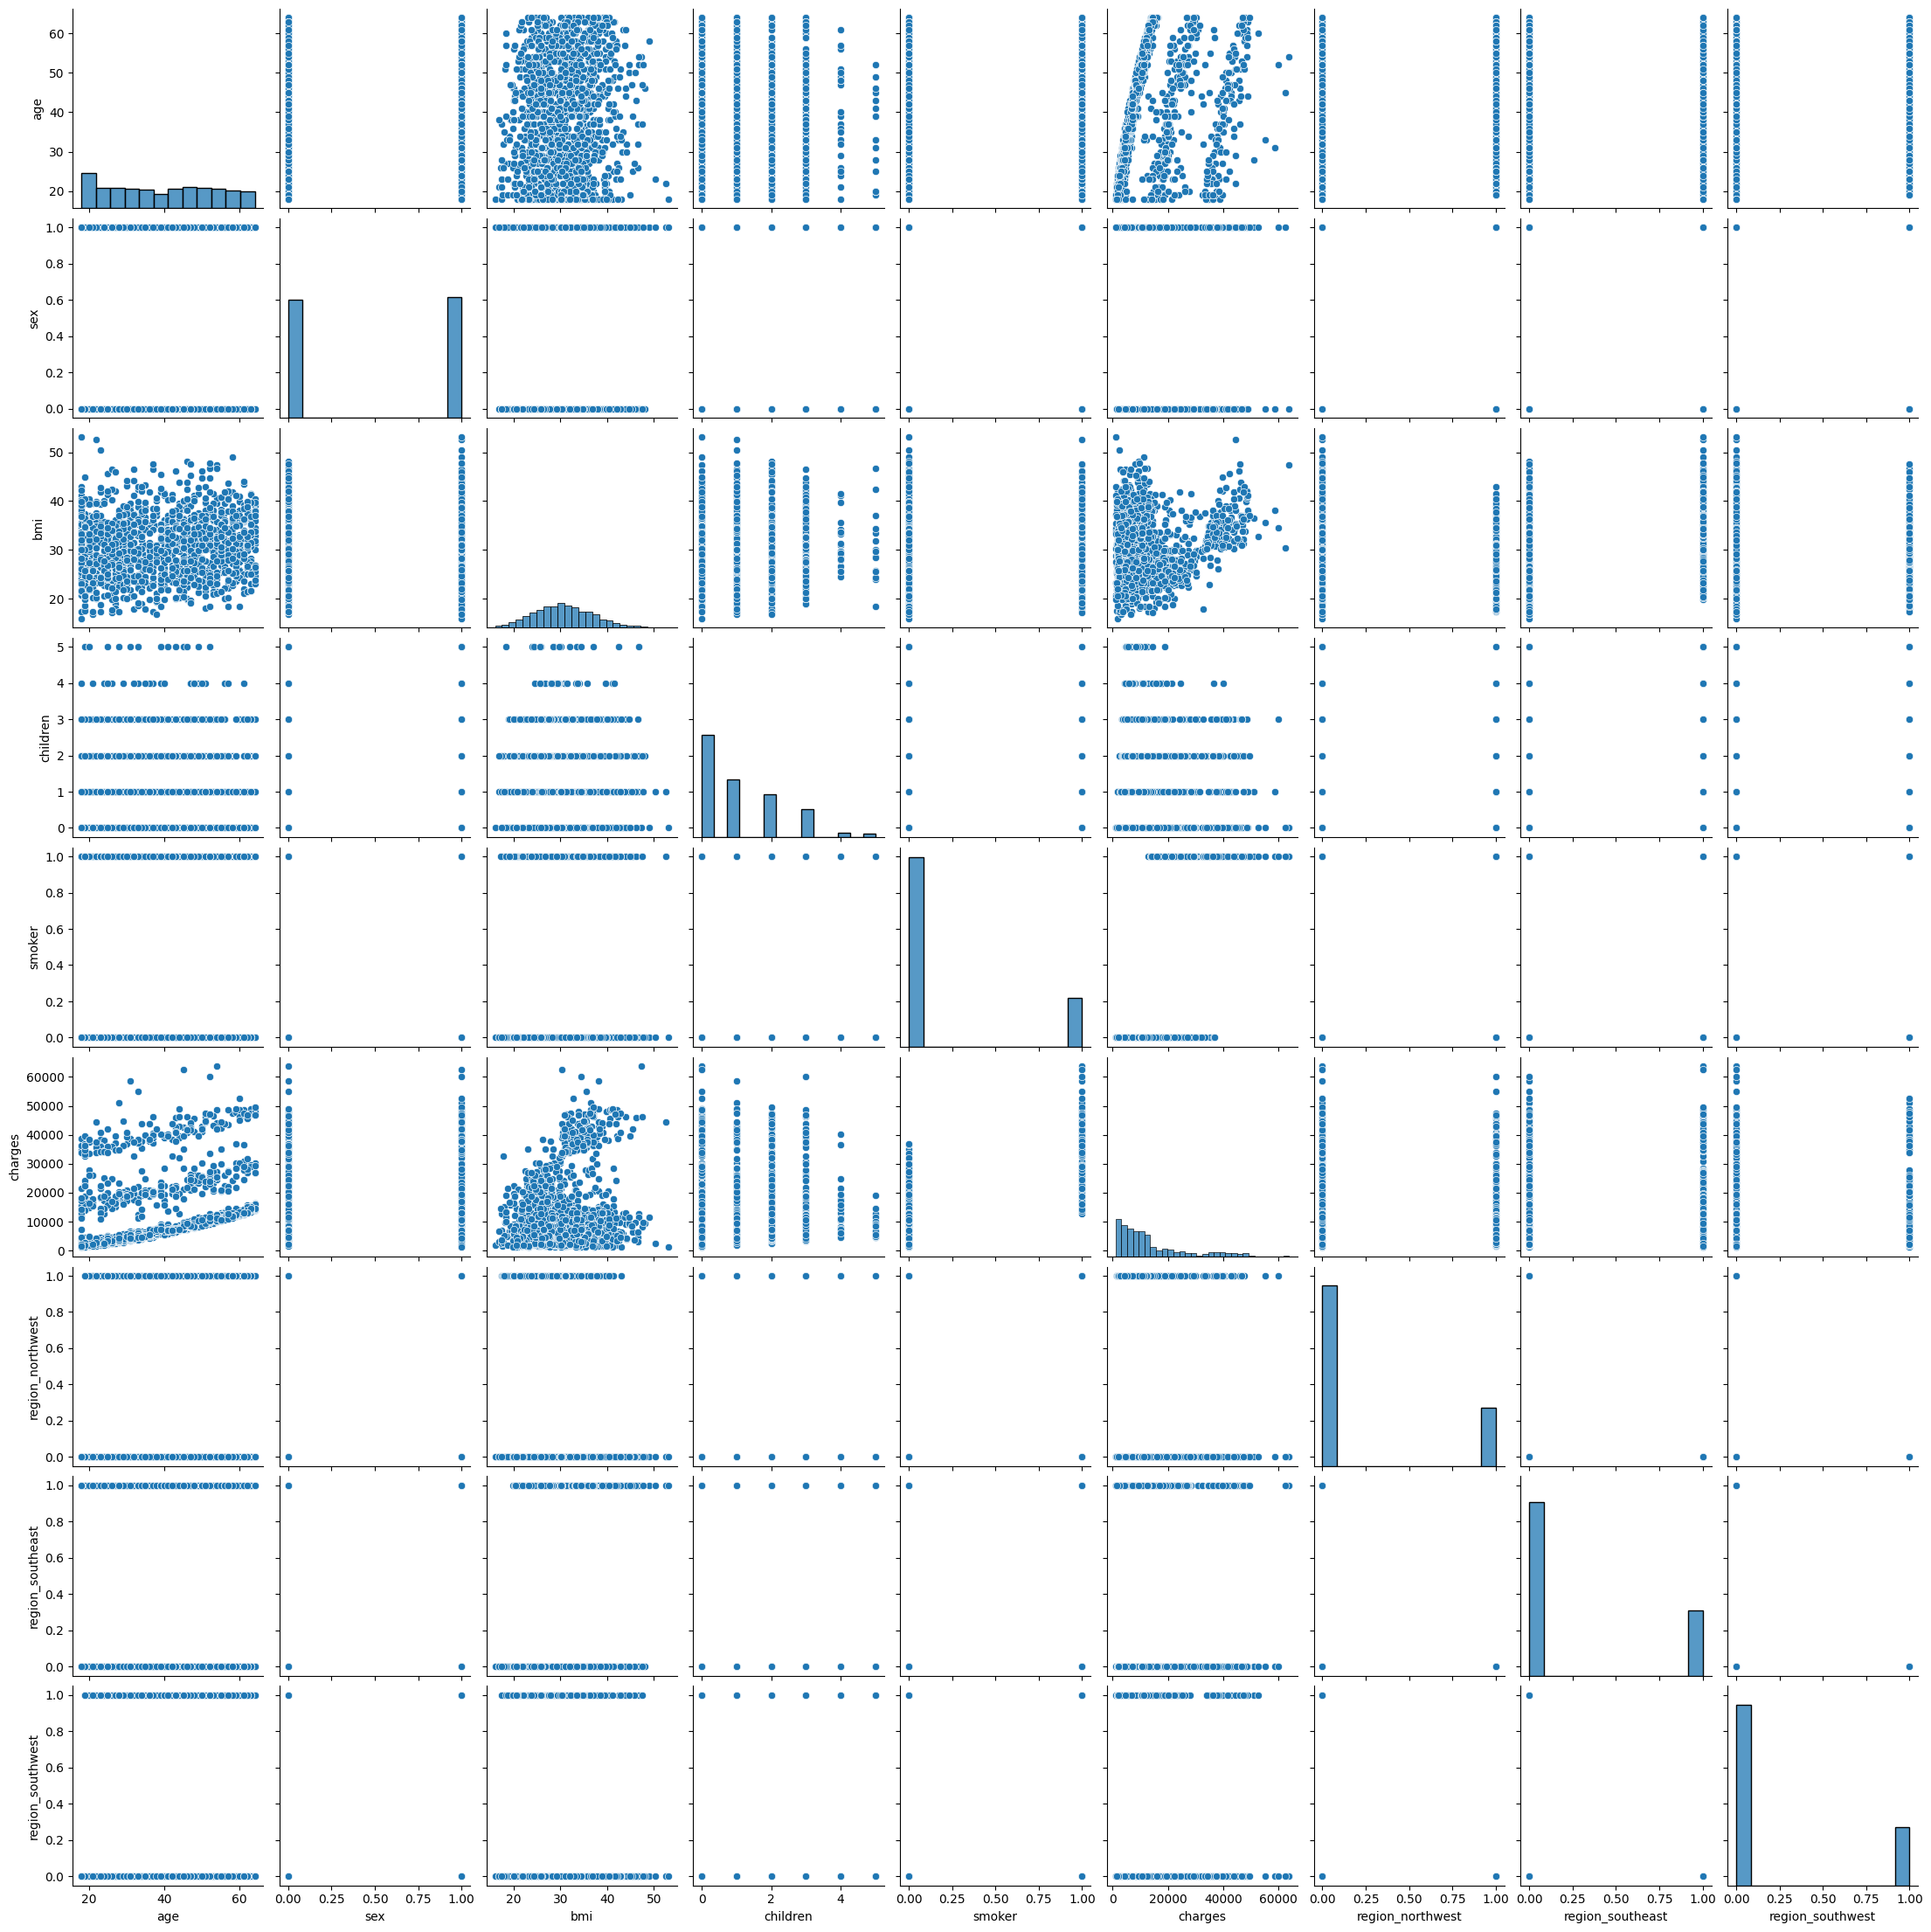

In [ ]:
sns.pairplot(dataset)

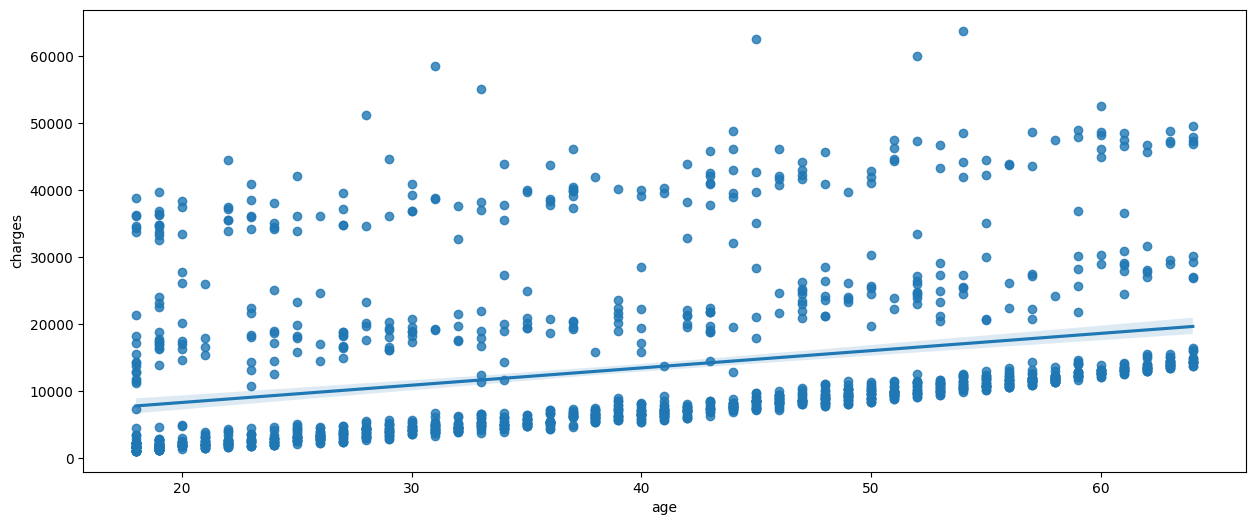

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(x='age',y='charges',data=dataset)
plt.show()

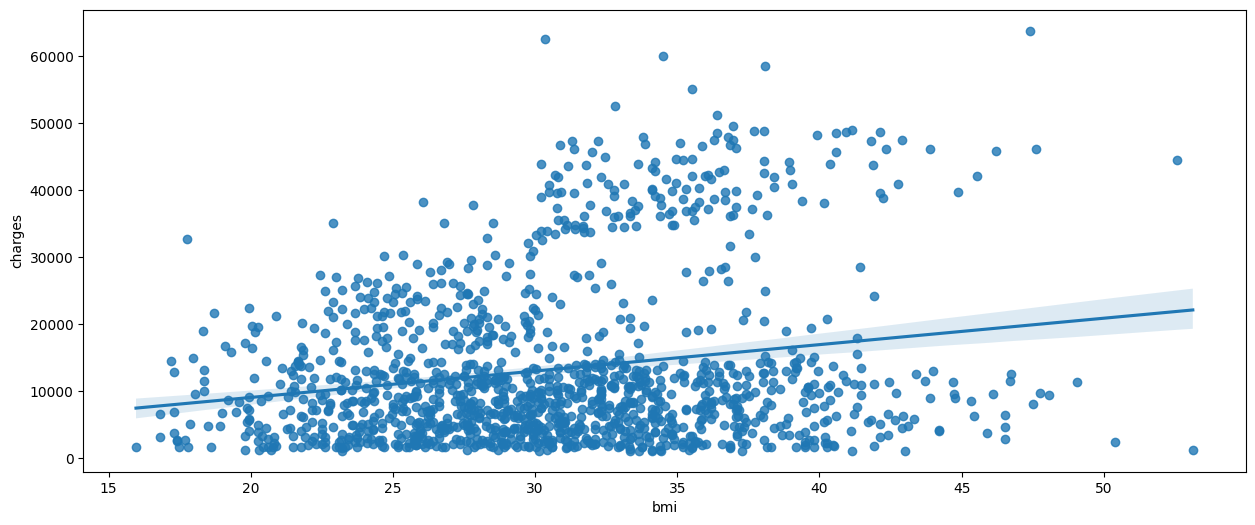

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(x='bmi',y='charges',data=dataset)
plt.show()

In [ ]:
dataset.corr()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

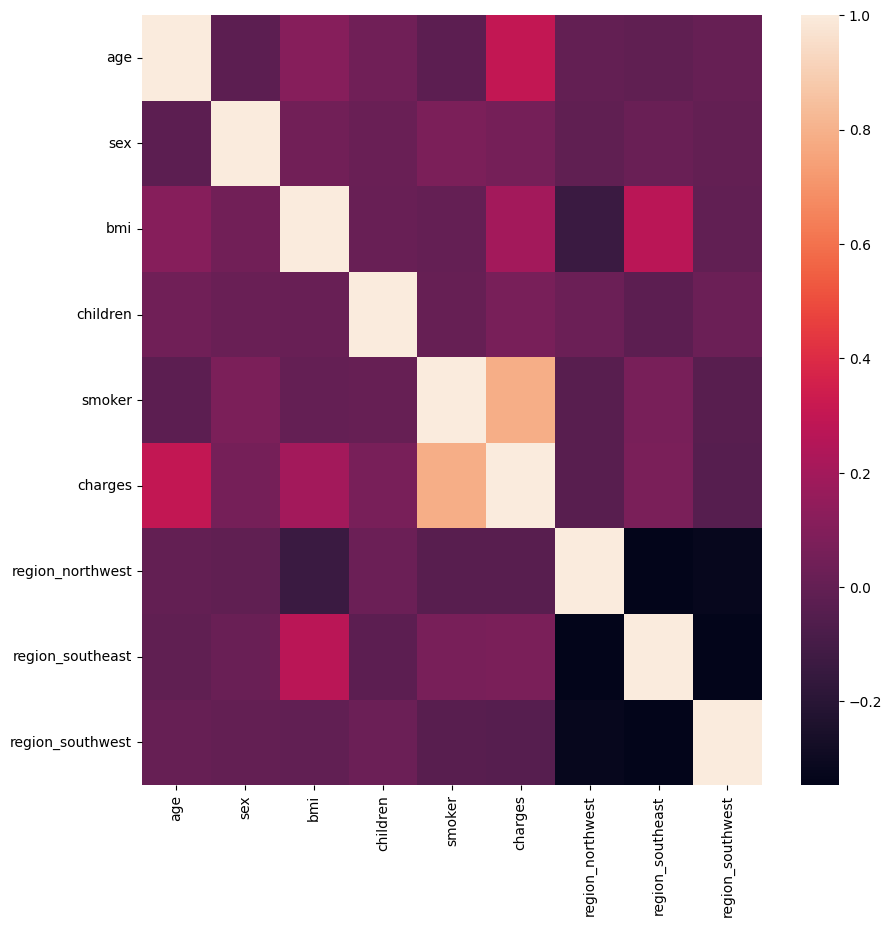

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

<Axes: >

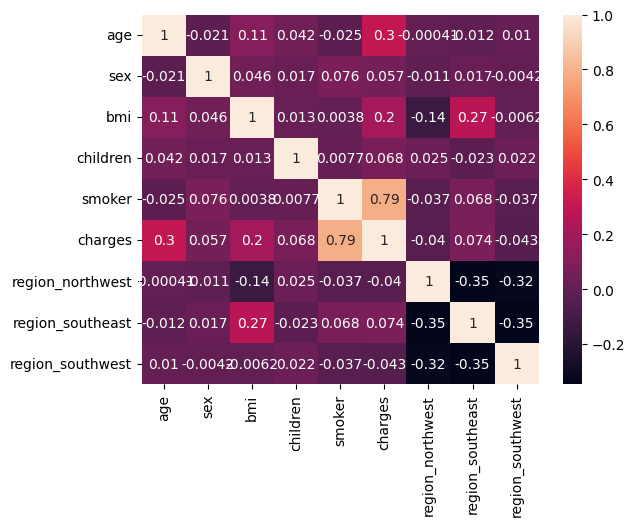

In [ ]:
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
X=dataset.drop(columns=['charges'])
y=dataset['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,False,False,True
1,18,1,33.770,1,0,False,True,False
2,28,1,33.000,3,0,False,True,False
3,33,1,22.705,0,0,True,False,False
4,32,1,28.880,0,0,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,True,False,False
1334,18,0,31.920,0,0,False,False,False
1335,18,0,36.850,0,0,False,True,False
1336,21,0,25.800,0,0,False,False,True


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X.shape

(1338, 8)

In [ ]:
y.shape

(1338,)

In [ ]:
X=np.array(X).astype('float32')
y=np.array(y).astype('float32')

In [ ]:
y=y.reshape(-1,1)

In [ ]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [ ]:
y

array([[16884.924 ],
       [ 1725.5522],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.36  ]], dtype=float32)

In [ ]:
y.shape

(1338, 1)

Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc=StandardScaler()
X=sc.fit_transform(X)
y=sc.fit_transform(y)



In [ ]:
X

array([[-1.4387642 , -1.0105187 , -0.45332006, ..., -0.5664179 ,
        -0.61132365,  1.765481  ],
       [-1.5099654 ,  0.9895908 ,  0.5096212 , ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       [-0.79795355,  0.9895908 ,  0.38330686, ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       ...,
       [-1.5099654 , -1.0105187 ,  1.0148778 , ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       [-1.2963619 , -1.0105187 , -0.79781353, ..., -0.5664179 ,
        -0.61132365,  1.765481  ],
       [ 1.5516857 , -1.0105187 , -0.261388  , ...,  1.765481  ,
        -0.61132365, -0.5664179 ]], dtype=float32)

In [ ]:
y

array([[ 0.29858378],
       [-0.95368916],
       [-0.72867465],
       ...,
       [-0.96159625],
       [-0.9303615 ],
       [ 1.3110534 ]], dtype=float32)

Training = 80%
Testing = 20%

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


In [ ]:
y_train.shape

(1070, 1)

Building the model with multiple linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score

regression_model_sklearn=LinearRegression()
regression_model_sklearn.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression_model_sklearn_accuracy=regression_model_sklearn.score(X_test,y_test)
regression_model_sklearn_accuracy

0.799987710582132

In [ ]:
y_predict=regression_model_sklearn.predict(X_test)

In [ ]:
sc.fit(y_train)

StandardScaler()

In [ ]:
y_predict_orig = sc.inverse_transform(y_predict)
y_test_orig=sc.inverse_transform(y_test)

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig,y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig,y_predict_orig)
MAE = mean_absolute_error(y_test_orig,y_predict_orig)
r2 = r2_score(y_test_orig,y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE,'\nMSE =',MSE,'\nMAE =',MAE,'\nR2 =',r2,'\nAdjusted R2 =',adj_r2)

RMSE = 0.461 
MSE = 0.21248415 
MAE = 0.3213757 
R2 = 0.7999877148126643 
Adjusted R2 = 0.7938097291698122


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train,y_train)

<ipython-input-92-77181618b014>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor_rf.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred =regressor_rf.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.8824469661775425

XGBoost Regression

In [ ]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [ ]:
y_pred =regressor_xgb.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

0.8987662850600685